In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 8s 0us/step


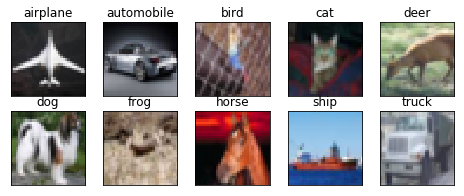

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
train_labels_integer = train_labels

test_labels_integer = test_labels

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels_integer[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Epoch 1/100
  5/390 [..............................] - ETA: 11s - loss: 1.3435 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 9s 23ms/step - loss: 1.2392 - acc: 0.5558 - val_loss: 1.0449 - val_acc: 0.6352
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.0537 - acc: 0.6278 - val_loss: 0.9166 - val_acc: 0.6817
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9259 - acc: 0.6742 - val_loss: 0.8258 - val_acc: 0.7111
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8414 - acc: 0.7083 - val_loss: 0.7970 - val_acc: 0.7184
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7790 - acc: 0.7308 - val_loss: 0.7220 - val_acc: 0.7552
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7258 - acc: 0.7503 - val_loss: 0.6873 - val_acc: 0.7641
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.6911 - acc: 0.7666 - val_loss: 0.6752 - val_acc: 0.7730
Epoch 8/100
390/390 [==============================] - 9s 22ms/step - loss

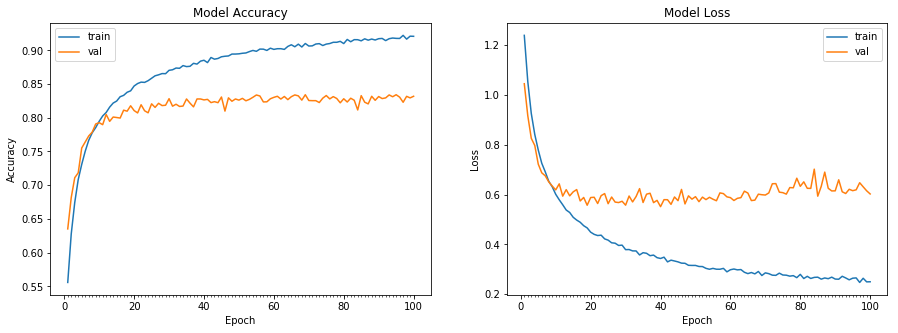

Accuracy on test data is: 83.19


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

By looking at several images, it appears that the receptive field is almost same as input image size.

Hence adding number of layers so that we reach the receptive field

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

from keras.layers import GlobalAveragePooling2D

In [0]:
def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  model.add(Dropout(0.25))

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model


In [0]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  model.add(Dropout(0.25))

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model.add(Convolution2D(10, 3, 3, border_mode='same')) #

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  if sys.path[0] == '':
W0618 12:47:34.392085 140172

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 256)       295168    
__________

In [0]:
filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  del sys.path[0]


Epoch 1/100
390/390 [==============================] - 94s 241ms/step - loss: 1.8387 - acc: 0.2916 - val_loss: 1.5708 - val_acc: 0.4127

Epoch 00001: val_acc improved from -inf to 0.41270, saving model to assignment_6a_eva.hdf5
Epoch 2/100
390/390 [==============================] - 89s 229ms/step - loss: 1.4254 - acc: 0.4749 - val_loss: 1.2746 - val_acc: 0.5332

Epoch 00002: val_acc improved from 0.41270 to 0.53320, saving model to assignment_6a_eva.hdf5
Epoch 3/100
390/390 [==============================] - 86s 221ms/step - loss: 1.1539 - acc: 0.5810 - val_loss: 1.0053 - val_acc: 0.6413

Epoch 00003: val_acc improved from 0.53320 to 0.64130, saving model to assignment_6a_eva.hdf5
Epoch 4/100
390/390 [==============================] - 87s 222ms/step - loss: 0.9408 - acc: 0.6626 - val_loss: 0.8549 - val_acc: 0.7009

Epoch 00004: val_acc improved from 0.64130 to 0.70090, saving model to assignment_6a_eva.hdf5
Epoch 5/100
390/390 [==============================] - 87s 222ms/step - loss: 0

KeyboardInterrupt: ignored

Changed the position of dropout

In [0]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.25))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model.add(Convolution2D(10, 3, 3, border_mode='same')) #

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 256)       295168    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 85s 217ms/step - loss: 1.9964 - acc: 0.2285 - val_loss: 1.6329 - val_acc: 0.3687

Epoch 00001: val_acc improved from -inf to 0.36870, saving model to assignment_6a_eva.hdf5
Epoch 2/100
390/390 [==============================] - 82s 210ms/step - loss: 1.4955 - acc: 0.4427 - val_loss: 1.3223 - val_acc: 0.5208

Epoch 00002: val_acc improved from 0.36870 to 0.52080, saving model to assignment_6a_eva.hdf5
Epoch 3/100
390/390 [==============================] - 82s 211ms/step - loss: 1.2084 - acc: 0.5614 - val_loss: 1.0419 - val_acc: 0.6305

Epoch 00003: val_acc improved from 0.52080 to 0.63050, saving model to assignment_6a_eva.hdf5
Epoch 4/100
390/390 [==============================] - 82s 211ms/step - loss: 0.9774 - acc: 0.6527 - val_loss: 0.9437 - val_acc: 0.6748

Epoch 00004: val_acc improved from 0.63050 to 0.67480, saving model to assignment_6a_eva.hdf5
Epoch 5/100
390/390 [==============================] - 82s 211ms/step - loss: 0

KeyboardInterrupt: ignored

10000

In [0]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model.add(Convolution2D(10, 3, 3, border_mode='same')) #

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_38 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_39 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_40 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 256)       295168    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 86s 220ms/step - loss: 1.8679 - acc: 0.2783 - val_loss: 1.5868 - val_acc: 0.3977

Epoch 00001: val_acc improved from -inf to 0.39770, saving model to assignment_6a_eva.hdf5
Epoch 2/100
390/390 [==============================] - 83s 212ms/step - loss: 1.4587 - acc: 0.4562 - val_loss: 1.3107 - val_acc: 0.5120

Epoch 00002: val_acc improved from 0.39770 to 0.51200, saving model to assignment_6a_eva.hdf5
Epoch 3/100
390/390 [==============================] - 83s 213ms/step - loss: 1.1913 - acc: 0.5659 - val_loss: 1.0755 - val_acc: 0.6078

Epoch 00003: val_acc improved from 0.51200 to 0.60780, saving model to assignment_6a_eva.hdf5
Epoch 4/100
390/390 [==============================] - 83s 213ms/step - loss: 0.9988 - acc: 0.6434 - val_loss: 0.9381 - val_acc: 0.6640

Epoch 00004: val_acc improved from 0.60780 to 0.66400, saving model to assignment_6a_eva.hdf5
Epoch 5/100
390/390 [==============================] - 83s 213ms/step - loss: 0

KeyboardInterrupt: ignored

In [0]:
model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 83.72


In [0]:
def get_wrongly_classified_indices(predictions, y_vals):
  
  """
  Takes predicted and actual values
  Returns a tuple of misclassified image indexes and their corresponding predicted and actual values
  
  NOTE: Make sure your predictions are in the same order of actuals, using shuffle=False while predicting would be important
  
  Params:
  predictions: probability values of predictions
  y_vals: actual values of data
  """
  
  predicted_y = np.argmax(predictions, axis=1)
  
  actual_y = np.argmax(y_vals, axis = 1)
  
  wrong_indices = np.nonzero(~(actual_y == predicted_y))
  
  return (wrong_indices[0], predicted_y[wrong_indices[0]], actual_y[wrong_indices[0]])
  
  
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15,20))
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[title],)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    #plt.tight_layout() # optional
    plt.subplots_adjust(hspace = 0.5)
    plt.show()
    
predictions = model.predict(test_features)
    
misclassified_image_idx = get_wrongly_classified_indices(predictions, test_labels_integer)

misclassified_image_idx

(array([   2,    3,    6, ..., 9981, 9982, 9989]),
 array([1, 8, 9, ..., 7, 6, 4]),
 array([8, 0, 1, ..., 4, 2, 2]))

In [0]:
number_of_im = len(misclassified_image_idx[0])

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

if (number_of_im) > 25:
  number_of_im = 25

figures = {}

for i in range(number_of_im):
  
  title = str(i+1)+'.\tPredicted: '.expandtabs()+class_names[misclassified_image_idx[1][i]] + '\n\tActual: '.expandtabs() + class_names[misclassified_image_idx[2][i]]
  
  img_idx = misclassified_image_idx[0][i]
  
  image = test_features[img_idx].reshape(32,32,3)
  
  figures[title] = image
  

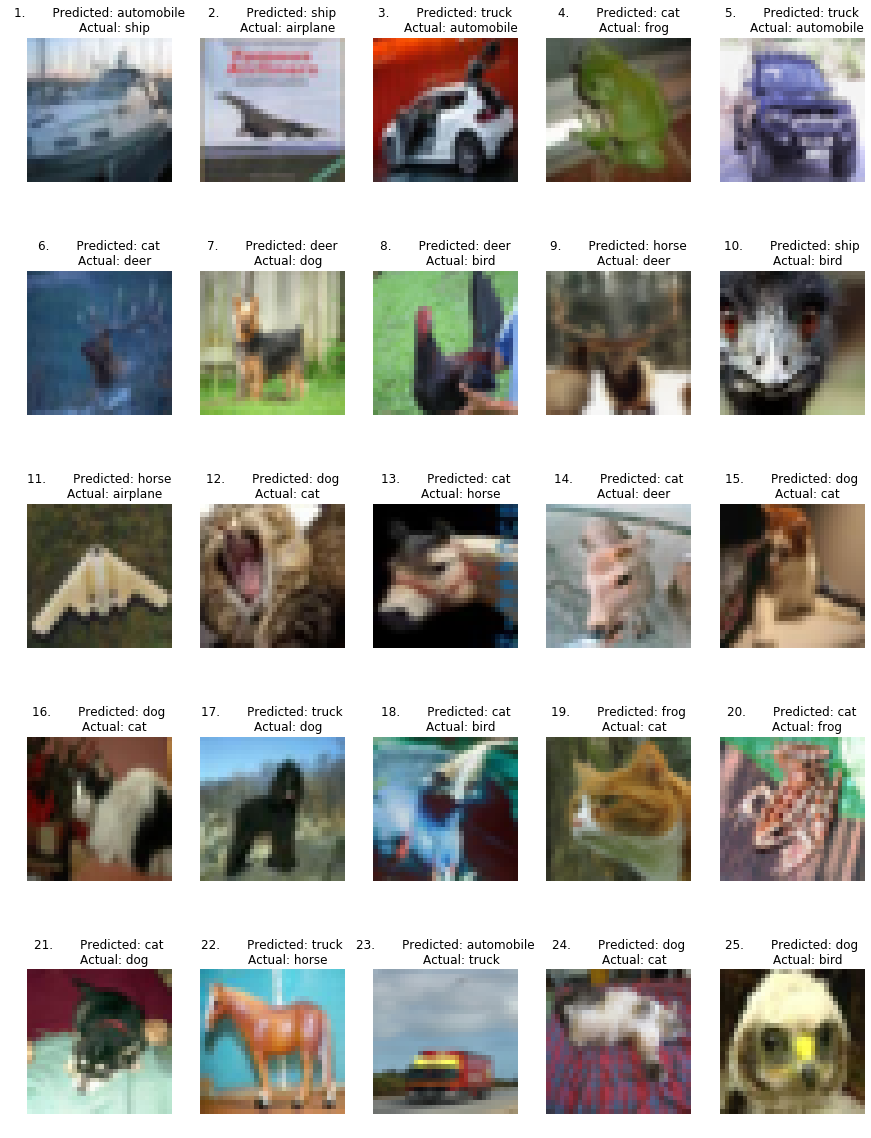

In [0]:
plot_figures(figures, 5, 5)

In [0]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model = transition_block(model)#27

model.add(Convolution2D(64, 3, 3,  border_mode='same'))#35 
model.add(Activation('relu'))
  
model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_87 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_88 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_89 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 32, 32, 256)       295168    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 86s 220ms/step - loss: 2.0317 - acc: 0.2133 - val_loss: 1.6731 - val_acc: 0.3631

Epoch 00001: val_acc improved from -inf to 0.36310, saving model to assignment_6a_eva.hdf5
Epoch 2/100
390/390 [==============================] - 82s 209ms/step - loss: 1.5403 - acc: 0.4211 - val_loss: 1.3827 - val_acc: 0.4859

Epoch 00002: val_acc improved from 0.36310 to 0.48590, saving model to assignment_6a_eva.hdf5
Epoch 3/100
390/390 [==============================] - 82s 209ms/step - loss: 1.2841 - acc: 0.5280 - val_loss: 1.1918 - val_acc: 0.5665

Epoch 00003: val_acc improved from 0.48590 to 0.56650, saving model to assignment_6a_eva.hdf5
Epoch 4/100
390/390 [==============================] - 82s 210ms/step - loss: 1.1033 - acc: 0.5991 - val_loss: 1.1185 - val_acc: 0.5940

Epoch 00004: val_acc improved from 0.56650 to 0.59400, saving model to assignment_6a_eva.hdf5
Epoch 5/100
390/390 [==============================] - 82s 210ms/step - loss: 0

KeyboardInterrupt: ignored

In [0]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model = transition_block(model)#27

model.add(Convolution2D(64, 3, 3,  border_mode='same'))#35 
model.add(Activation('relu'))

model.add(Convolution2D(128, 3, 3, border_mode='same'))#43
model.add(Activation('relu'))

model.add(Convolution2D(256, 3, 3, border_mode='same'))#51
model.add(Activation('relu'))

model.add(Convolution2D(512, 3, 3, border_mode='same'))#59
#model.add(Activation('relu'))
  
model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_112 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_113 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_114 (Activation)  (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 32, 32, 256)       295168    
__________

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_23 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 128)       0         
__________

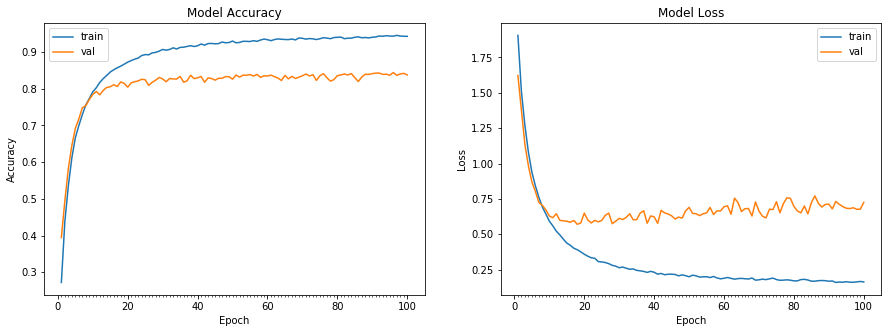

Accuracy on test data is: 84.41


In [12]:
# Define the model

def conv_block(model):
  
  model.add(Convolution2D(64, 3, 3,  border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Convolution2D(128, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.2))
  
  model.add(Convolution2D(256, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  model.add(Dropout(0.4))
  model.add(Convolution2D(512, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  
  return model

def transition_block(model):
  

  model.add(Convolution2D(32, 1, 1, border_mode='same'))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  return model

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #1 
model.add(Activation('relu'))

model = conv_block(model) #9

model = transition_block(model)#10

model = conv_block(model)#26

model = transition_block(model)#27

model.add(Convolution2D(64, 3, 3,  border_mode='same'))#35 
model.add(Activation('relu'))

model.add(Convolution2D(10, 3, 3, border_mode='same')) #37

model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

filepath = "assignment_6a_eva.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint] ,verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)

model.load_weights("assignment_6a_eva.hdf5")
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))